In [155]:
import pyforest
import numpy as np
import pandas as pd
data = pd.read_csv("Interests_group.csv")

In [156]:
data

,group,grand_tot_interests,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
0,C,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C,43,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
2,C,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
3,C,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN
4,C,36,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6335,I,53,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN
6336,I,48,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
6337,I,48,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
6338,I,38,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN


In [157]:
data.interest1.value_counts()

interest1
1.0    993
Name: count, dtype: int64

threshold = 2000  
columns_to_drop = data.columns[data.isnull().sum() > threshold]
data.drop(columns=columns_to_drop, inplace=True)


In [158]:
df = data.drop(["group","grand_tot_interests"],axis=1)

In [159]:
for i in df.columns:
    count = df[i].unique()
    print("column name", i, "value_count is", count)

column name interest1 value_count is [nan  1.]
column name interest2 value_count is [nan  1.]
column name interest3 value_count is [nan  1.]
column name interest4 value_count is [nan  1.]
column name interest5 value_count is [nan  1.  2.]
column name interest6 value_count is [nan  1.  2.]
column name interest7 value_count is [nan  1.]
column name interest8 value_count is [nan  1.]
column name interest9 value_count is [nan  1.  2.]
column name interest10 value_count is [nan  1.]
column name interest11 value_count is [nan  1.]
column name interest12 value_count is [ 1. nan  2.]
column name interest13 value_count is [nan  1.]
column name interest14 value_count is [nan  1.]
column name interest15 value_count is [nan  1.]
column name interest16 value_count is [ 1. nan  2.]
column name interest17 value_count is [nan  1.]
column name interest18 value_count is [nan  1.]
column name interest19 value_count is [nan  1.]
column name interest20 value_count is [nan  1.]
column name interest21 value_

In [160]:
for i in df.columns:
    count = df[i].value_counts()
    print("column name", i, "value_count is", count)

column name interest1 value_count is interest1
1.0    993
Name: count, dtype: int64
column name interest2 value_count is interest2
1.0    1
Name: count, dtype: int64
column name interest3 value_count is interest3
1.0    35
Name: count, dtype: int64
column name interest4 value_count is interest4
1.0    25
Name: count, dtype: int64
column name interest5 value_count is interest5
1.0    797
2.0      1
Name: count, dtype: int64
column name interest6 value_count is interest6
1.0    3392
2.0       2
Name: count, dtype: int64
column name interest7 value_count is interest7
1.0    1
Name: count, dtype: int64
column name interest8 value_count is interest8
1.0    93
Name: count, dtype: int64
column name interest9 value_count is interest9
1.0    332
2.0      1
Name: count, dtype: int64
column name interest10 value_count is interest10
1.0    1
Name: count, dtype: int64
column name interest11 value_count is interest11
1.0    175
Name: count, dtype: int64
column name interest12 value_count is interest

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6340 entries, 0 to 6339
Columns: 219 entries, group to interest217
dtypes: float64(217), int64(1), object(1)
memory usage: 10.6+ MB


In [162]:
single_category_columns = [col for col in df.columns if df[col].nunique() == 1]
print(single_category_columns)


['interest1', 'interest2', 'interest3', 'interest4', 'interest7', 'interest8', 'interest10', 'interest11', 'interest13', 'interest14', 'interest15', 'interest17', 'interest18', 'interest19', 'interest20', 'interest22', 'interest23', 'interest24', 'interest25', 'interest26', 'interest27', 'interest28', 'interest29', 'interest30', 'interest31', 'interest32', 'interest33', 'interest34', 'interest35', 'interest36', 'interest38', 'interest39', 'interest41', 'interest42', 'interest44', 'interest45', 'interest46', 'interest49', 'interest51', 'interest52', 'interest53', 'interest54', 'interest55', 'interest56', 'interest60', 'interest65', 'interest67', 'interest68', 'interest69', 'interest72', 'interest73', 'interest74', 'interest75', 'interest76', 'interest77', 'interest82', 'interest85', 'interest86', 'interest87', 'interest88', 'interest91', 'interest93', 'interest94', 'interest95', 'interest96', 'interest98', 'interest99', 'interest100', 'interest101', 'interest102', 'interest103', 'intere

In [163]:
data.drop(columns=single_category_columns,inplace=True)

In [164]:
double_category_columns = [col for col in data.columns if data[col].nunique() == 2]
print(double_category_columns)


['interest5', 'interest6', 'interest9', 'interest12', 'interest16', 'interest21', 'interest37', 'interest40', 'interest43', 'interest47', 'interest48', 'interest50', 'interest57', 'interest58', 'interest59', 'interest61', 'interest62', 'interest63', 'interest64', 'interest66', 'interest70', 'interest71', 'interest78', 'interest79', 'interest80', 'interest81', 'interest83', 'interest84', 'interest89', 'interest90', 'interest92', 'interest97', 'interest104', 'interest109', 'interest110', 'interest112', 'interest115', 'interest117', 'interest118', 'interest119', 'interest120', 'interest124', 'interest127', 'interest137', 'interest139', 'interest142', 'interest144', 'interest147', 'interest148', 'interest149', 'interest154', 'interest157', 'interest160', 'interest162', 'interest164', 'interest180', 'interest181', 'interest183', 'interest189', 'interest200', 'interest202', 'interest204', 'interest205', 'interest208', 'interest210', 'interest211', 'interest212', 'interest215', 'interest216']

In [165]:

for col in double_category_columns:
    mode_val = data[col].mode()[0]
    data[col].fillna(mode_val, inplace=True)


In [166]:
data

,group,grand_tot_interests,interest5,interest6,interest9,interest12,interest16,interest21,interest37,interest40,...,interest200,interest202,interest204,interest205,interest208,interest210,interest211,interest212,interest215,interest216
0,C,17,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,C,43,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,C,27,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,C,34,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,C,36,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6335,I,53,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6336,I,48,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6337,I,48,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6338,I,38,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [167]:
trippel_category_columns = [col for col in df.columns if df[col].nunique() == 3]
print(trippel_category_columns)


[]


In [168]:
data

,group,grand_tot_interests,interest5,interest6,interest9,interest12,interest16,interest21,interest37,interest40,...,interest200,interest202,interest204,interest205,interest208,interest210,interest211,interest212,interest215,interest216
0,C,17,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,C,43,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,C,27,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,C,34,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,C,36,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6335,I,53,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6336,I,48,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6337,I,48,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6338,I,38,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


okay if we see that with one unique value we have lot of null values in that fetre intested of traeting them i prefer to drop to avoide miscallsification

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6340 entries, 0 to 6339
Data columns (total 71 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   group                6340 non-null   object 
 1   grand_tot_interests  6340 non-null   int64  
 2   interest5            6340 non-null   float64
 3   interest6            6340 non-null   float64
 4   interest9            6340 non-null   float64
 5   interest12           6340 non-null   float64
 6   interest16           6340 non-null   float64
 7   interest21           6340 non-null   float64
 8   interest37           6340 non-null   float64
 9   interest40           6340 non-null   float64
 10  interest43           6340 non-null   float64
 11  interest47           6340 non-null   float64
 12  interest48           6340 non-null   float64
 13  interest50           6340 non-null   float64
 14  interest57           6340 non-null   float64
 15  interest58           6340 non-null   f

In [170]:

columns_with_many_nans = data.columns[data.isnull().sum() > 2000]
print(columns_with_many_nans)

Index([], dtype='object')


In [171]:

threshold = 2000
missing_percentage = (data.isnull().sum() / len(data)) * 100
columns_with_many_nans = missing_percentage[missing_percentage > threshold].index
print(columns_with_many_nans)


Index([], dtype='object')


In [173]:
da = pd.get_dummies(data["group"]).astype("int")

In [174]:
df = pd.concat([data, da], axis=1)

In [175]:
df

,group,grand_tot_interests,interest5,interest6,interest9,interest12,interest16,interest21,interest37,interest40,...,interest208,interest210,interest211,interest212,interest215,interest216,C,I,P,R
0,C,17,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1,0,0,0
1,C,43,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1,0,0,0
2,C,27,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1,0,0,0
3,C,34,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1,0,0,0
4,C,36,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6335,I,53,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0,1,0,0
6336,I,48,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0,1,0,0
6337,I,48,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0,1,0,0
6338,I,38,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0,1,0,0


In [176]:
df.drop("group",axis=1,inplace=True)


applying all unsupervised algo

In [177]:
from sklearn.cluster import KMeans ,kmeans_plusplus
KM = KMeans( n_clusters = 5,init = 'k-means++' )
KM.fit(df)

c:\Users\suyog\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [178]:
K1=KMeans(n_clusters=8)

In [179]:
K1.fit(df)

c:\Users\suyog\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans()

In [180]:
centroid=KM.cluster_centers_
centroid1=K1.cluster_centers_

In [181]:
centroid

array([[36.29734732,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1. 

In [182]:
centroid1

array([[65.8442029 ,  1.00362319,  1.00724638,  1.00362319,  1.00724638,
         1.00724638,  1.00724638,  1.00362319,  1.00362319,  1.        ,
         1.00724638,  1.00362319,  1.00362319,  1.00362319,  1.00724638,
         1.00724638,  1.00362319,  1.        ,  1.00362319,  1.00724638,
         1.00724638,  1.00362319,  1.        ,  1.00724638,  1.00362319,
         1.00724638,  1.00362319,  1.00724638,  1.00724638,  1.00362319,
         1.00362319,  1.00724638,  1.00724638,  1.00724638,  1.00362319,
         1.00724638,  1.00362319,  1.00362319,  1.00362319,  1.00362319,
         1.00362319,  1.00362319,  1.00362319,  1.00362319,  1.00724638,
         1.00724638,  1.        ,  1.        ,  1.        ,  1.00362319,
         1.00362319,  1.00362319,  1.00362319,  1.00362319,  1.00724638,
         1.00362319,  1.00724638,  1.00362319,  1.00724638,  1.00362319,
         1.00362319,  1.00724638,  1.00362319,  1.00362319,  1.00362319,
         1.00724638,  1.00724638,  1.00724638,  1.0

In [183]:
from sklearn.metrics import silhouette_score
silhouette_score(df,KM.labels_)

0.5095832685644023

In [184]:
from sklearn.metrics import silhouette_score
silhouette_score(df,K1.labels_)

0.48090098335066583

KM model is good

In [185]:
wcss=[]
for i in range(1,40):
  k2=KMeans(n_clusters=i)
  k2.fit(df)
  wcss.append(k2.inertia_) 

c:\Users\suyog\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\suyog\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\suyog\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\suyog\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

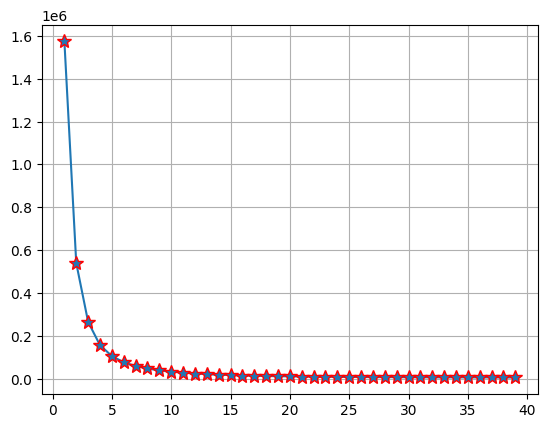

In [186]:
plt.plot(range(1,40),wcss,marker='*',ms=10,mec='r')
plt.grid() 

8 value of cluster is looks good

hierarchy

In [191]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage

<IPython.core.display.Javascript object>

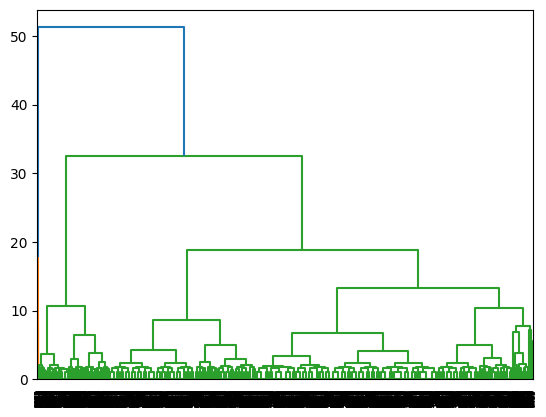

In [192]:
linkage2 = linkage(df,method ="average")
hierarchy.dendrogram(linkage2)
plt.show()

In [197]:
from sklearn.cluster import AgglomerativeClustering
AC = AgglomerativeClustering(n_clusters=2)
AC.fit(df)
print("Agglomerative Clustering:")
print(AC.labels_)

Agglomerative Clustering:
[0 1 0 ... 1 1 1]


In [198]:
silhouette_score(df,AC.labels_)

0.5578532029322508

DBSCAN

In [187]:
from sklearn.cluster import DBSCAN
d1=DBSCAN(eps=10,min_samples=5)
d1.fit(df)

DBSCAN(eps=10)

In [188]:
d1.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [189]:
silhouette_score(df,d1.labels_)

0.7101755502816615

now with pca all unsupervised algo

In [199]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=2)
componant = pca1.fit_transform(df)
print(componant)
new = pd.DataFrame(componant)

[[-20.31379673  -0.29148041]
 [  5.68591394  -0.41239458]
 [-10.31390801  -0.33798586]
 ...
 [ 10.69145455   0.75835858]
 [  0.69156583   0.80486403]
 [ 28.69125425   0.67464877]]


In [200]:
from sklearn.cluster import KMeans ,kmeans_plusplus
KA = KMeans( n_clusters = 5,init = 'k-means++' )
KA.fit(new)

c:\Users\suyog\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [201]:
from sklearn.metrics import silhouette_score
silhouette_score(new,KM.labels_)

0.5239159440100677

In [202]:
wcss=[]
for i in range(1,40):
  k2=KMeans(n_clusters=i)
  k2.fit(new)
  wcss.append(k2.inertia_) 

c:\Users\suyog\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\suyog\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\suyog\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\suyog\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

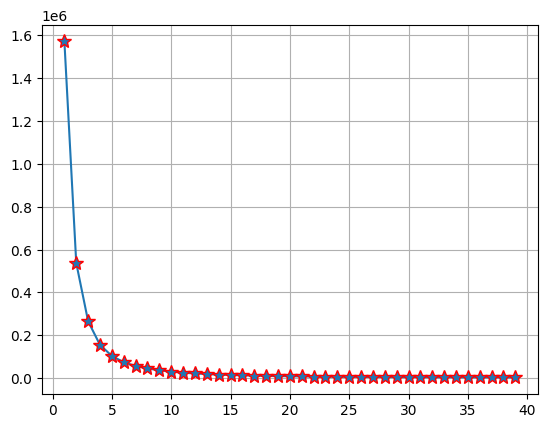

In [203]:
plt.plot(range(1,40),wcss,marker='*',ms=10,mec='r')
plt.grid() 

In [208]:
from sklearn.cluster import KMeans ,kmeans_plusplus
KA = KMeans( n_clusters = 9,init = 'k-means++' )
KA.fit(new)

c:\Users\suyog\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=9)

In [209]:
from sklearn.metrics import silhouette_score
silhouette_score(new,KA.labels_)

0.5215799334530837

With hier

<IPython.core.display.Javascript object>

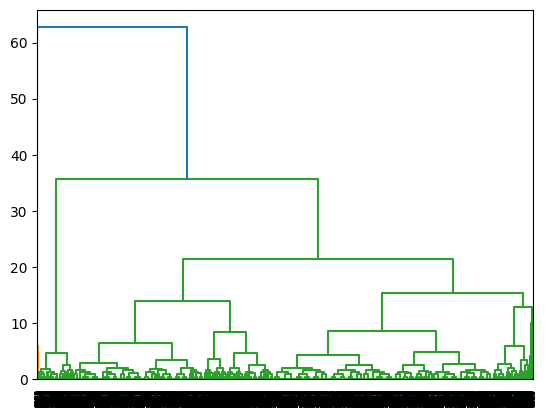

In [207]:
linkage2 = linkage(new,method ="average")
hierarchy.dendrogram(linkage2)
plt.show()

In [210]:
from sklearn.cluster import AgglomerativeClustering
AC1 = AgglomerativeClustering(n_clusters=2)
AC1.fit(new)
print("Agglomerative Clustering:")
print(AC1.labels_)

Agglomerative Clustering:
[0 0 0 ... 1 0 1]


In [211]:
silhouette_score(new,AC1.labels_)

0.4819298572130425

with hier

In [212]:
from sklearn.cluster import DBSCAN
d4=DBSCAN(eps=10,min_samples=5)
d4.fit(new)

DBSCAN(eps=10)

In [213]:
silhouette_score(new,d4.labels_)

0.7099957915372634